<img align="left" src="./img/lu.png" hspace="20"/> <img align="right" src="./img/midlands+.png"/> 
<br/><br/><br/><br/><br/><br/><br/>

------

## Matplotlib

[Matplotlib](https://matplotlib.org/) is a Python 2D and 3D plotting library which produces publication quality figures including line plots, contour plots, color map plots, histograms, power spectra, bar charts, error charts, scatterplots, etc.

Matplotlib provides two interfaces: the Matlab-like API (`matlab.pylab`) and the matplotlib object-oriented API. The former enables a syntax very close to that of Matlab plotting functions and is suitable for quickly generating simple plots, whilst the latter uses an object-oriented approach for more control and customisation of plots and allows users to add one or more axes object to a figure. Each axe is separate and has a large number of methods for controlling the plots. So in a simple world, you can put multiple plots in one figure canvas and each plot has separate controls. For the plotting functions in the Matlab-like API, they actually exist as methods of axes instances.

I recommend using the matplotlib object-oriented API anywhere except situations where a simple plot is enough for your purposes. In this lecture, we will demonstrate how to use the matplotlib object-oriented API to generate advanced figures that are usually used in scientific publication and presentation. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

------

### Global settings

Before creating actual figures, matplotlib allows user to customise the default styles and properties of Matplotlib by using style sheets and rcParams. These settings are global, and the customer-defined styles and properties will be applied to all successive figures.

The `style` package of matplotlib can be used to define a specific style which users might prefer.  There are a number of pre-defined styles provided by matplotlib, see the full list of supported styles [here](https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/stylelib). Or:

In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


To define a style, use `plt.style.use('style name here')`.

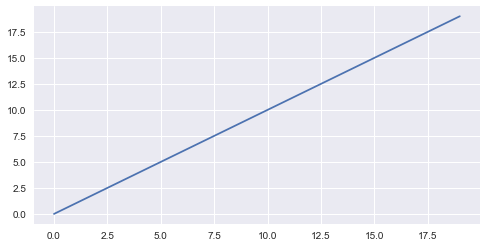

In [3]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(20))

To change the default properties (such as line width, font size and etc), use `matplotlib.rcParams`, a dictionary-like variable storing all of the properties settings.

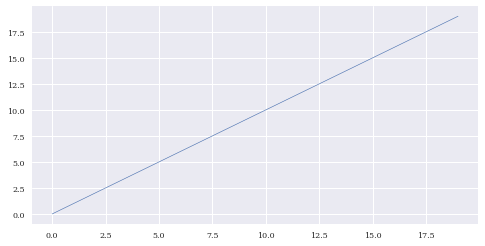

In [4]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.6
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 11
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(20))

------

### Figure size and DPI

After the global settings, we can start plotting the actual figures. To use the matplotlib object-oriented API, we first create a figure instance and store a reference to a variable, e.g. `fig`. In the mean time we can add as many axes as you want to the figure instance, and all axes instances are stored in e.g. `ax`. Don’t confuse axis with axes. Axis is the axis (e.g. x and y axis) of the plot, where ticks and tick labels are associated. The axes is the area a plot appears in. During the creation of the figure instance, we can specify the figure size and DPI by providing the keywords arguments. Note that the default unit of figure size is inches.

Text(0.5,1,'Title')

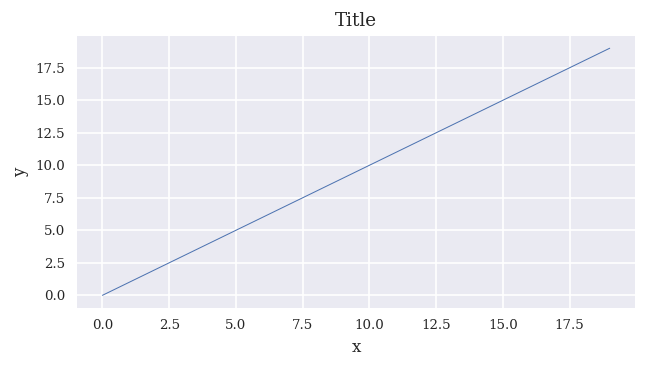

In [5]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
ax.plot(np.arange(20))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Title')

Then we can save the figure using the `fig.savefig` function where you can specify the format as well as DPI. Matplotlib supports several formats such as PNG, EPS, SVG, and PDF.

In [6]:
fig.savefig('misc\myfigure.png', dpi=300)

------

### Titles, labels and legends

To add customer titles and labels, use the `set_title`, `set_xlabel` and `set_ylabel` methods associated with `ax` object. The properties (such as fonts and font sizes) can be modified by specifying the keywords arguments of the methods.

Text(0.5,1,'Title')

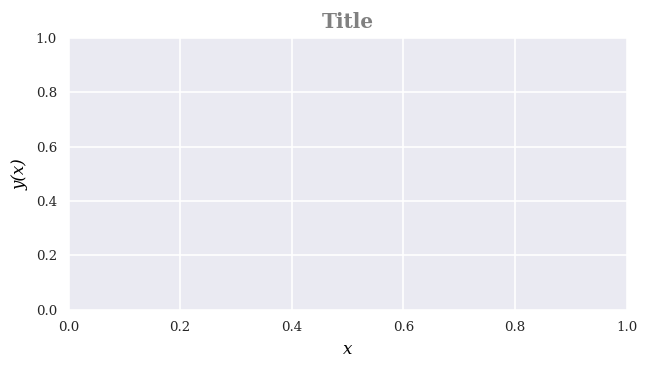

In [7]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
ax.set_xlabel('x', color='black', size=10, style='italic')
ax.set_ylabel('y(x)', color='black', size=10, style='italic')
ax.set_title('Title', color='grey', size=12, weight='bold')

Figure legends can be added by specifying the `label` keyword argument in the actual plot function and can be decorated by using the `ax.legend` function.

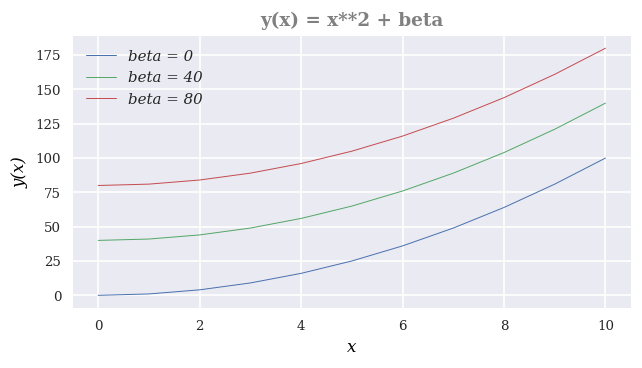

In [8]:
x = np.arange(11)

fig, ax = plt.subplots(figsize=(6, 3), dpi=120)
ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title('y(x) = x**2 + beta', color='grey', fontsize=11, weight='bold')
ax.plot(x, x**2., label='beta = 0')
ax.plot(x, x**2. + 40, label='beta = 40')
ax.plot(x, x**2. + 80, label='beta = 80')
ax.legend(loc=2, prop={'size': 9, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

------

### Lines and markers

Line and marker styles can be defined in the plot functions by providing with keywords arguments. A full list of supported line styles can be found [here](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py), and filled/unfilled marker types are available [here](https://matplotlib.org/gallery/lines_bars_and_markers/marker_reference.html#sphx-glr-gallery-lines-bars-and-markers-marker-reference-py). In matplotlib there are [8 ways](https://matplotlib.org/gallery/color/color_demo.html#sphx-glr-gallery-color-color-demo-py) to specify color values of graphical elements. Let's take a look at a few examples here to demonstrate how to use them. First we can define the colors of lines and markers using the Matlab-like syntax, e.g. `b` or `g` where `b` means blue and `g` is green. Alternatively, colors can be defined with their names or RGB hex codes. The `alpha` keyword is used to control the transparency of lines and markers. 

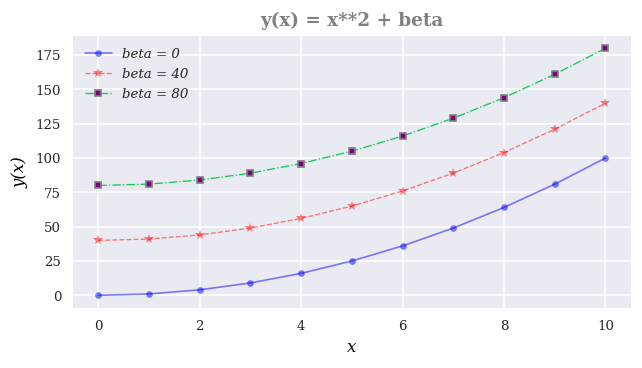

In [9]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)

ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title('y(x) = x**2 + beta', color='grey', fontsize=11, weight='bold')

ax.plot(x, x**2., 'b-', lw=1, marker='o', ms=4, alpha=0.5, label='beta = 0')  # blue solid line with line width = 1 
ax.plot(x, x**2. + 40, color='red', ls='--', lw=0.8, marker='*', ms=6, alpha=0.5, label='beta = 40')  # red dashed line
ax.plot(x, x**2. + 80, color='#15cc55', ls='-.', lw=0.8, marker='s', ms=4, 
        markerfacecolor="purple", markeredgewidth=1, markeredgecolor="grey", alpha=1, label='beta = 80')  # green dash-dotted line

ax.legend(loc=2, prop={'size': 8, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

------

### Axis appearance

To make high-quality publication figures, it is often required to customise the axis properties including the plot ranges, placement of ticks, customer tick labels and axis grids. The value ranges of x and y axis can be set by using the `ax.set_xlim` and ` ax.set_xlim` methods, or `axis('tight')` for automatically setting *tightly fitted* axes ranges. The locations where ticks are placed can be determined explicitly by providing a list of values to the `set_xticks` and ` set_yticks`. We can then put a list of customer tick labels to the defined locations using `set_xticklabels` and `set_yticklabels`. With `ax.grid`, we can switch on/off grid lines, as well as modifying their styles, colors and etc.

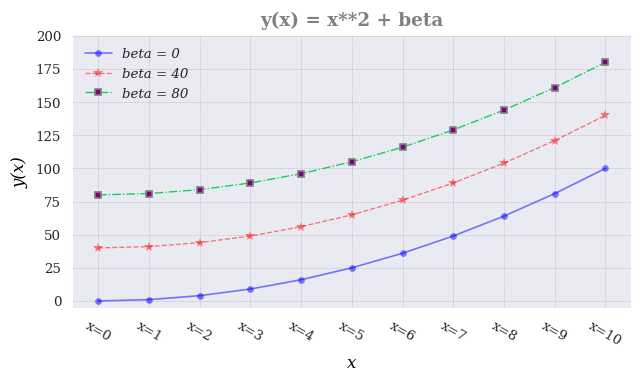

In [10]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)

ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title('y(x) = x**2 + beta', color='grey', fontsize=11, weight='bold')

ax.plot(x, x**2., 'b-', lw=1, marker='o', ms=4, alpha=0.5, label='beta = 0')  # blue solid line with line width = 1 
ax.plot(x, x**2. + 40, color='red', ls='--', lw=0.8, marker='*', ms=6, alpha=0.5, label='beta = 40')  # red dashed line
ax.plot(x, x**2. + 80, color='#15cc55', ls='-.', lw=0.8, marker='s', ms=4, 
        markerfacecolor="purple", markeredgewidth=1, markeredgecolor="grey", alpha=1, label='beta = 80')  # green dash-dotted line

ax.legend(loc=2, prop={'size': 8, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

# set x&y axis ranges
ax.set_ylim([-5, 200])
ax.set_xlim([-0.5, 10.5])

# ticks
ax.set_xticks(np.arange(11))

# customer tick labels
ax.set_xticklabels(['x=%s' % i for i in np.arange(11)], fontsize=8, rotation=-30)

# grid lines
ax.grid(color='grey', alpha=0.5, linestyle='dashed', linewidth=0.3)

------

### Text

To meet the requirements of figures for scientific publications, we shall make sure the text is displayed clearly in a professional scientific way, e.g. showing scientific equations with right Greek letters. To achieve this, we need LaTeX formatted text, a LaTeX code encapsulated by two dollar signs (e.g. $\$$y(x) = x^2 + \beta$\$$ will appear as $y(x) = x^2 + \beta$). Note that in LaTeX backslash is a frequently used symbol, e.g. `\beta` produces the Greek letter $\beta$. However, in Python strings backslash has a special meaning: escape character. To eliminate this conflict, we need to use the Python *raw* strings by prepending an `r` to a text string, e.g. use `r'\beta'` instead of `'\beta'`.

We can add text annotation to figures by using the `ax.text` function that also supports LaTeX just like text in titles and labels.  

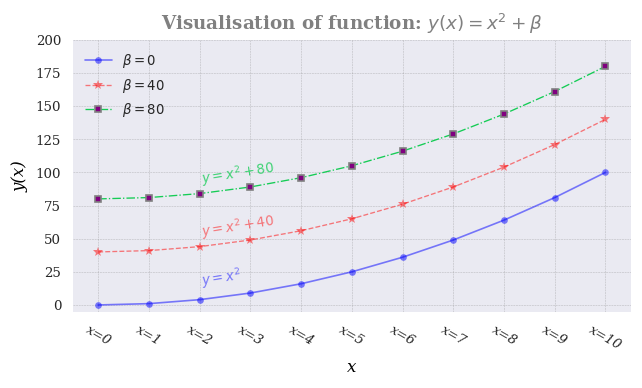

In [11]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=120)

ax.set_xlabel('x', color='black', fontsize=10, style='italic')
ax.set_ylabel('y(x)', color='black', fontsize=10, style='italic')
ax.set_title(r'Visualisation of function: $y(x) = x^2 + \beta$', color='grey', fontsize=11, weight='bold')

ax.plot(x, x**2., 'b-', lw=1, marker='o', ms=4, alpha=0.5, label=r'$\beta = 0$')  # blue solid line with line width = 1 
ax.plot(x, x**2. + 40, color='red', ls='--', lw=0.8, marker='*', ms=6, alpha=0.5, label=r'$\beta = 40$')  # red dashed line
ax.plot(x, x**2. + 80, color='#15cc55', ls='-.', lw=0.8, marker='s', ms=4, 
        markerfacecolor="purple", markeredgewidth=1, markeredgecolor="grey", alpha=1, label=r'$\beta = 80$')  # green dash-dotted line

ax.legend(loc=2, prop={'size': 8, 'weight': 'normal', 'style': 'italic'})  # loc means location and 2 means upper left

# set x&y axis ranges
ax.set_ylim([-5, 200])
ax.set_xlim([-0.5, 10.5])

# ticks
ax.set_xticks(np.arange(11))

# customer tick labels
ax.set_xticklabels([r'x=%s' % i for i in np.arange(11)], fontsize=8, style='italic', rotation=-30)

# grid lines
ax.grid(color='grey', alpha=0.5, linestyle='dashed', linewidth=0.3)

# text annotation
ax.text(2, 100, r"$y=x^2 + 80$", fontsize=8, color="#15cc55", alpha=.8, style='italic', rotation=9)
ax.text(2, 60, r"$y=x^2 + 40$", fontsize=8, color="red", alpha=.5, style='italic', rotation=9)
ax.text(2, 19, r"$y=x^2$", fontsize=8, color="blue", alpha=.5, style='italic', rotation=9)

plt.show()

------

### Multiple plots

To put multiple plots in a figure canvas, we can tailor a customer layout of subplots by using layout managers such as `subplots`, `subplot2grid`, or `gridspec`, or the `inset_axes` function to manually add insets.

* Subplots

`Subplots` can be used to create multiple axes in a regular grid by specifying the dimensions in row and column.

ax has a type of  <class 'numpy.ndarray'>


Text(0.5,1,'Box plot')

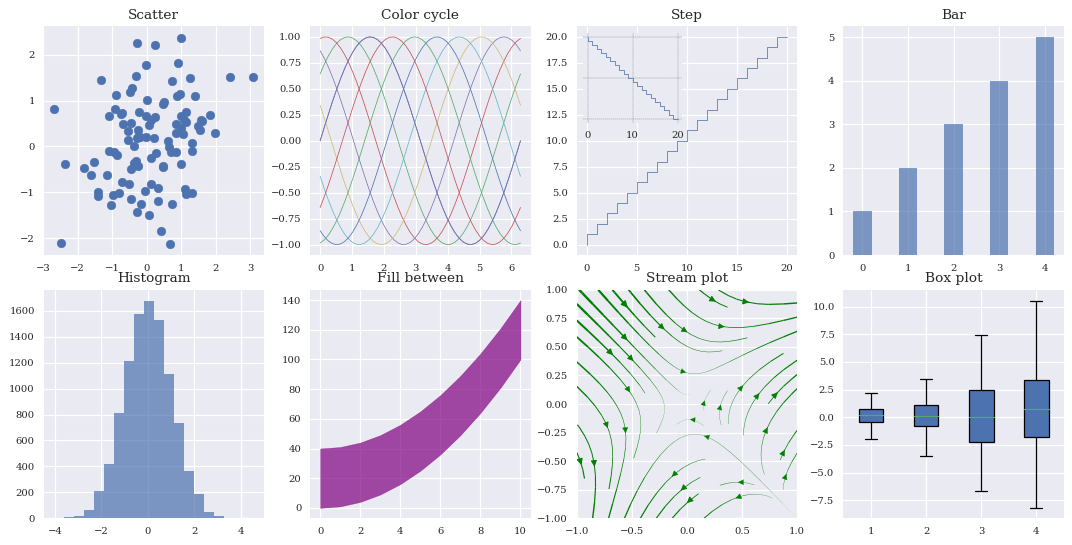

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(2, 4, figsize=(12, 6), dpi=90)
fig.tight_layout()
print('ax has a type of ', type(ax))

# scatter plot
x, y = np.random.normal(size=(2, 100))
ax[0, 0].scatter(x, y)
ax[0, 0].set_title('Scatter')

# Plotting 10 sinusoidal lines with default color cycle
x = np.linspace(0, 2 * np.pi, 50)
shift = np.linspace(0, 2 * np.pi, 10)
for s in shift:
    ax[0, 1].plot(x, np.sin(x + s), '-')
ax[0, 1].set_title('Color cycle')
    
# Step plot
ax[0, 2].step(np.arange(21), np.arange(21))
ax[0, 2].set_title('Step')
inset_axes = inset_axes(ax[0, 2], width="45%", height=1.0, loc=2)
inset_axes.step(np.arange(21), -1 * np.arange(21))
inset_axes.grid(color='k', alpha=0.5, linestyle='dashed', linewidth=0.3)
inset_axes.set_yticklabels([])

# bar chart
ax[0, 3].bar(np.arange(5), np.arange(5) + 1, align="center", width=0.4, alpha=0.7)
ax[0, 3].set_title('Bar')

# histogram
ax[1, 0].hist(np.random.randn(10000), alpha=0.7, bins=20)
ax[1, 0].set_title('Histogram')

# fill between
x = np.arange(11)
ax[1, 1].fill_between(x, x**2, x**2+40, alpha=0.7, color='purple')
ax[1, 1].set_title('Fill between')

# Stream plot
Y, X = np.mgrid[-1:1:100j, -1:1:100j]
U = X**2 + Y
V = X - Y**2
speed = np.sqrt(U*U + V*V)
lw = speed / speed.max()
ax[1, 2].streamplot(X, Y, U, V, density=0.5, color='green', linewidth=lw * 2.)
ax[1, 2].set_title('Stream plot')

# box plot
data = [np.random.normal(0, std, 100) for std in range(1, 5)]
bplot = ax[1, 3].boxplot(data, vert=True, patch_artist=True)
ax[1, 3].set_title('Box plot')


Different from above, we can create axes sequentially to be able to have sperate controls on some properties of `subplots` (e.g. *projection* and *polar*). `subplots` accepts the following syntax `subplots(m, n, p)` and `subplots(mnp)` that breaks the figure canvas into m-by-n` sub-windows and picks the p$th$ window to draw a plot.

Text(0.5,0,'Pie chart')

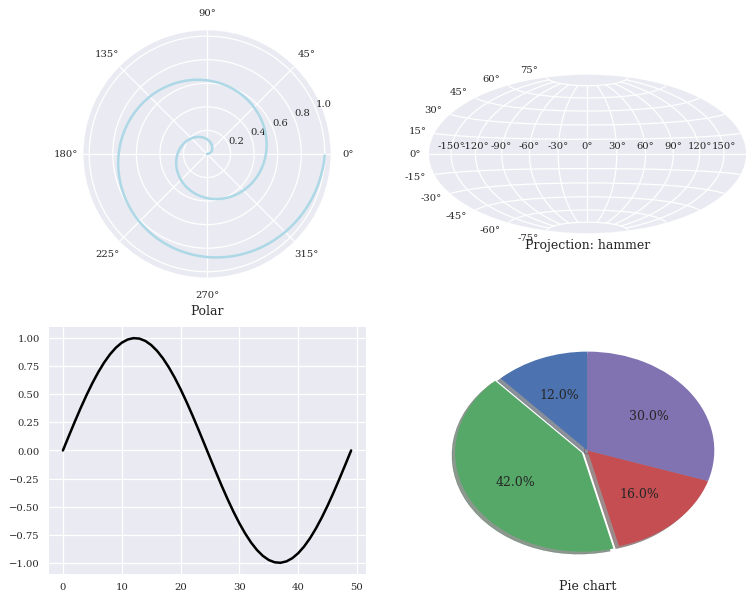

In [13]:
plt.figure(figsize=(10, 8), dpi=90)
ax1 = plt.subplot(221, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2 * 2*np.pi * r
ax1.plot(theta, r, color='lightblue', lw=2)
ax1.set_xlabel('Polar')

ax2 = plt.subplot(222, projection="hammer")
ax2.set_xlabel('Projection: hammer')

ax3 = plt.subplot(223)
x = np.linspace(0, 2 * np.pi, 50)
ax3.plot(np.sin(x), 'k-', lw=2)

ax4 = plt.subplot(224)
ax4.pie([12, 42, 16, 30], explode=(0, 0.05, 0, 0), autopct='%1.1f%%', shadow=True, startangle=90)
ax4.set_xlabel('Pie chart')

* subplot2grid

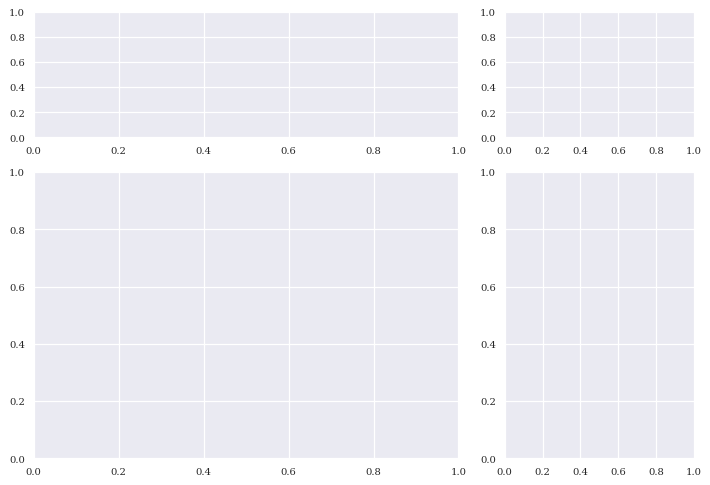

In [14]:
fig = plt.figure(dpi=90)
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2))
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
fig.tight_layout()

* gridspec

`gridspec` allows to adjust relative heights and widths of rows and columns.

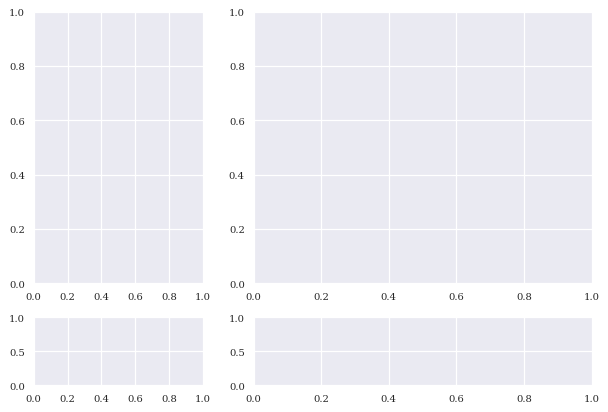

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(dpi=90)
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

------

### Contours and colormaps

`pcolormesh`, `imshow`, `contourf` and `contour` are commonly used functions to plot 2D field data. Reference for colormaps included with Matplotlib is available [here]( https://matplotlib.org/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py). Apart from the predefined colormaps, users can define their own colormaps.

Text(0.5,1,'contour')

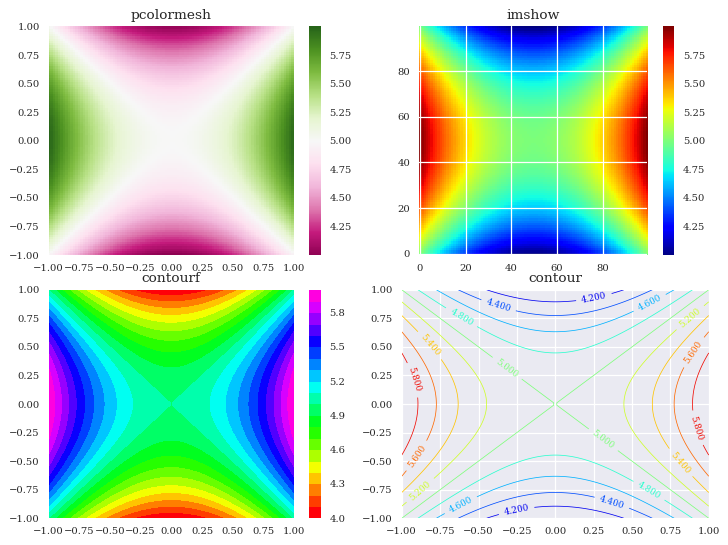

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6), dpi=90)
fig.tight_layout()

x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2 + 5.

h1 = ax[0, 0].pcolormesh(X, Y, Z, cmap=plt.get_cmap('PiYG'), vmin=Z.min(), vmax=Z.max())
fig.colorbar(h1, ax=ax[0, 0])
ax[0, 0].set_title('pcolormesh')

h2 = ax[0, 1].imshow(Z, cmap=plt.get_cmap('jet'), vmin=Z.min(), vmax=Z.max(), origin='lower')
fig.colorbar(h2, ax=ax[0, 1])
ax[0, 1].set_title('imshow')

h3 = ax[1, 0].contourf(X, Y, Z, 21, cmap=plt.get_cmap('gist_rainbow'), vmin=Z.min(), vmax=Z.max())
fig.colorbar(h3, ax=ax[1, 0])
ax[1, 0].set_title('contourf')

h4 = ax[1, 1].contour(X, Y, Z, 10, cmap=plt.get_cmap('jet'), vmin=Z.min(), vmax=Z.max())
ax[1, 1].clabel(h4, inline=1, fontsize=7)
ax[1, 1].set_title('contour')

------

### 3D plots

To create 3D figures, first an `axes3D` object needs to be created just like any other axes using the `projection='3d'` keyword.

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

fig = plt.figure(figsize=(12, 10), dpi=90)
fig.tight_layout()

ax1 = plt.subplot(221, projection='3d')
t = np.linspace(0.0, 2 * np.pi, 100)
x = t * np.cos(6*t)
y = t * np.sin(6*t)
ax1.plot(x, y, t, 'r-', lw=1)
ax1.set_title('Line3D')

ax2 = plt.subplot(222, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax2.plot_surface(X, Y, Z, cmap=plt.get_cmap('PiYG'), linewidth=0, antialiased=False)
ax2.set_title('Surface3D')

ax3 = plt.subplot(223, projection='3d')
x1, y1, z1 = np.random.normal(size=(3, 50))
x2, y2, z2 = np.random.normal(size=(3, 50))
ax3.scatter(x1, y1, z1)
ax3.scatter(x2, y2, z2, marker='s')
ax3.set_title('Scatter3D')

ax4 = plt.subplot(224, projection='3d')
u = (np.linspace(0, 2.0 * np.pi, endpoint=True, num=50) * np.ones((10, 1))).flatten()
v = np.repeat(np.linspace(-0.5, 0.5, endpoint=True, num=10), repeats=50).flatten()
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)
tri = mtri.Triangulation(u, v)
ax4.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.get_cmap('tab20c'))
ax4.set_title('Trisurf3D')




Text(0.5,0.92,'Trisurf3D')

------

### PyQtGraph

The main drawback of matplotlib in scientific visualisation is the limited capability in rapid plot updates, video, and real-time interactivity. For users who concern speed in visualisation, [PyQtGraph](http://pyqtgraph.org/) is the right option. It is a pure-python graphics and GUI library built on PyQt4/PySide and NumPy and designated for mathematics/scientific/engineering applications. Using matplotlib as the main visualisation tool and PyQtGraph as a complement for rapid plot updates would solve most of your problems.

------

### More reading
* [Matplotlib main page](https://matplotlib.org/)
* [Matplotlib Gallery](https://matplotlib.org/gallery.html) - A large number of showcases consisting of various types of plots with Python source included. You can always find one that satisfies your requirements. Highly recommend.
* [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)
* [PyQtGraph documentation](http://pyqtgraph.org/documentation/)
* [SciPy lecture notes: plotting](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)